# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_path = r'E:\kaggle\Credit_score_classification\train/train.csv'
test_path = r'E:\kaggle\Credit_score_classification\test/test.csv'

# Importing custom scoring and model comparison libraries

In [3]:
#import sys

import all_score_report,all_model_comparison

In [4]:
train_df = pd.read_csv(train_path)

In [5]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [6]:
train_df.shape

(100000, 28)

In [7]:
train_df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          3635
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio     99998
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98790
Credit_Score                     3
dtype: int64

In [8]:
train_df=train_df.drop_duplicates()

In [9]:
train_df.shape

(100000, 28)

In [10]:
train_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [11]:
train_df.isnull().mean()*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [12]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


### ID has all unique values so let's drop that, cust_id and name should be same because they represent the same thing but, the unique name are less than unique cust_id because name column has many missing values and cust_id doesn't have missing value so we can easily drop name column, SSN also has same unique values as cust_id so that can also be dropped.

In [13]:
train_df= train_df.drop(["ID","Name","SSN"],1)

In [14]:
pd.set_option("display.max_columns",None)

In [15]:
train_df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [16]:
train_df.dtypes

Customer_ID                  object
Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

### Observation: Age is numerical column but due to garbage values it is showing object datatype, Same for Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance

In [17]:
list_of_data_conversion_col = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit",
                               "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]

In [18]:
for col in list_of_data_conversion_col:
    train_df[col] = pd.to_numeric(train_df[col],errors="coerce") 

In [19]:
train_df.dtypes

Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

### Now the datatypes look good but, there will be more missing values as we have replaced unknown values in object dataframe to NaN during type casting

In [20]:
train_df.isnull().mean()*100

Customer_ID                  0.000
Month                        0.000
Age                          4.939
Occupation                   0.000
Annual_Income                6.980
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  4.785
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       9.746
Changed_Credit_Limit         2.091
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             1.009
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      8.784
Payment_Behaviour            0.000
Monthly_Balance              1.209
Credit_Score                 0.000
dtype: float64

## Before imputing missing values let's have look at data distribution for missing values columns

In [21]:
missing_values_list = train_df.columns[train_df.isnull().sum() >0]

In [22]:
missing_values_list

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan',
       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [23]:
train_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,95061.000000,9.302000e+04,84998.000000,100000.000000,100000.00000,100000.000000,95215.000000,100000.000000,90254.000000,97909.000000,98035.000000,98991.000000,100000.000000,100000.000000,91216.000000,98791.000000
mean,110.934505,1.785790e+05,4194.170850,17.091280,22.47443,72.466040,2.780339,21.068780,31.033051,10.389025,27.754251,1426.503700,32.285173,1403.118217,195.539456,402.551258
std,689.407864,1.442878e+06,3183.686167,117.404834,129.05741,466.422621,62.500940,14.860104,226.955758,6.789496,193.177339,1155.045753,5.116875,8306.041270,199.564527,213.925499
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,1.943560e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,30.306660,72.236692,270.106630
50%,33.000000,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.370000,32.305784,69.249473,128.954538,336.731225
75%,42.000000,7.284338e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1948.200000,36.496663,161.224249,236.815814,470.262938
max,8698.000000,2.419806e+07,15204.633330,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


### Still, due to random values in many columns we can see that the std is very high compared to mean
### Age can't be -500, Num_Bank_Accounts can't be -1,Num_of_Loan can't be -100,Delay_from_due_date can't be -5, Num_of_Delayed_Payment can't be -3, Changed_Credit_Limit can't be -6.49

In [24]:
print(train_df[train_df["Age"]<0]["Age"].unique())
print(" ")
print(train_df[train_df["Num_Bank_Accounts"]<0]["Num_Bank_Accounts"].unique())
print(" ")
print(train_df[train_df["Num_of_Loan"]<0]["Num_Bank_Accounts"].unique())
print(" ")
print(train_df[train_df["Delay_from_due_date"]<0]["Delay_from_due_date"].unique())
print(" ")
print(train_df[train_df["Num_of_Delayed_Payment"]<0]["Num_of_Delayed_Payment"].unique())
print(" ")
print(train_df[train_df["Changed_Credit_Limit"]<0]["Changed_Credit_Limit"].unique())

[-500.]
 
[-1]
 
[   2    7    0    8    1    6    4    5    9    3   10 1488 1332  494
 1414 1724   45  210   26  942  632  482  844 1798 1123 1624  688 1636
  423  243 1124 1153  616 1440 1676 1166  609  136 1310 1616  610  912
   -1  449 1323  575  771 1604 1033  385  318 1669   11 1627 1760 1345
   69  421  383  584]
 
[-1 -2 -3 -5 -4]
 
[-1. -3. -2.]
 
[-2.01 -1.01 -3.01 -1.24 -4.14 -0.14 -2.87 -2.46 -4.26 -1.26 -1.33 -1.49
 -0.31 -1.48 -1.06 -2.17 -1.1  -0.05 -5.48 -4.48 -1.28 -1.93 -1.94 -5.02
 -4.2  -0.04 -2.11 -3.37 -3.43 -0.43 -3.69 -2.69 -3.52 -0.32 -3.58 -4.76
 -1.76 -0.5  -1.8  -0.8  -3.5  -3.93 -5.78 -1.29 -0.29 -3.67 -1.21 -2.52
 -0.52 -4.19 -0.74 -2.34 -0.34 -0.26 -1.65 -0.02 -1.16 -2.16 -5.63 -2.37
 -2.49 -0.08 -4.33 -6.48 -0.48 -0.7  -1.64 -0.62 -1.13 -2.13 -4.59 -2.35
 -4.35 -3.34 -4.88 -0.59 -0.61 -1.83 -2.95 -0.95 -1.95 -4.36 -1.61 -6.31
 -5.31 -3.98 -0.24 -1.89 -3.36 -3.68 -2.31 -4.31 -1.31 -1.52 -1.08 -4.15
 -3.15 -4.98 -5.5  -2.55 -1.77 -0.66 -1.92 -3.05 -1.35 -

In [25]:
train_df["Age"] = train_df["Age"].replace(-500,np.nan) 
train_df["Num_Bank_Accounts"] = train_df["Num_Bank_Accounts"].replace(-1,np.nan) 
train_df["Delay_from_due_date"] = train_df["Delay_from_due_date"].replace([-1,-2,-3,-4,-5],np.nan) 
train_df["Num_of_Delayed_Payment"] = train_df["Num_of_Delayed_Payment"].replace([-1,-2,-3],np.nan) 


In [26]:
filt = train_df["Changed_Credit_Limit"]<0
train_df["Changed_Credit_Limit"].loc[filt]=np.nan

In [27]:
filt = train_df["Num_of_Loan"]<0
train_df["Num_of_Loan"].loc[filt]=np.nan

In [28]:
train_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,94175.000000,9.302000e+04,84998.000000,99979.000000,100000.00000,100000.000000,91339.000000,99409.000000,89632.000000,96323.000000,98035.000000,98991.000000,100000.000000,100000.000000,91216.000000,98791.000000
mean,116.682187,1.785790e+05,4194.170850,17.095080,22.47443,72.466040,7.141856,21.207245,31.259863,10.599042,27.754251,1426.503700,32.285173,1403.118217,195.539456,402.551258
std,690.079845,1.442878e+06,3183.686167,117.416871,129.05741,466.422621,60.040246,14.794693,227.725486,6.639966,193.177339,1155.045753,5.116875,8306.041270,199.564527,213.925499
min,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,25.000000,1.943560e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.570000,3.000000,566.080000,28.052567,30.306660,72.236692,270.106630
50%,33.000000,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.520000,6.000000,1166.370000,32.305784,69.249473,128.954538,336.731225
75%,42.000000,7.284338e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,15.010000,9.000000,1948.200000,36.496663,161.224249,236.815814,470.262938
max,8698.000000,2.419806e+07,15204.633330,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


## There are still some garbage values because Age is having max as 8698 which is not possible, so before imputing missing value, we need to remove outliers, otherwise far values will have effect on mean, median values while imputing

In [29]:
def remove_outliers_box(df,col):
    tf= np.percentile(df[col].dropna(),25)
    sf= np.percentile(df[col].dropna(),75)
    iqr = sf-tf
    ll= tf-(1.5*iqr)
    ul= sf+(1.5*iqr)
    filt = (df[col]>=ll)&(df[col]<=ul)
    fin_df=df.loc[filt]
    return fin_df
    

In [30]:
def remove_outliers_zscore(df,col):
    std= df[col].std()
    mean= df[col].mean()
    ll= mean-(3*std)
    ul= mean+(3*std)
    filt = (df[col]>=ll)&(df[col]<=ul)
    fin_df=df.loc[filt]
    return fin_df

In [31]:
train_df.shape

(100000, 25)

In [32]:
list_of_numeric_col=[]
for col in train_df.columns:
    if train_df[col].dtype != "O":
        list_of_numeric_col.append(col)
        
    

In [33]:
list_of_numeric_col

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [34]:
new_df = train_df.copy()

In [35]:
for col in list_of_numeric_col:
    print("Before",new_df.shape)
    new_df = remove_outliers_box(new_df,col)
    print("After",new_df.shape)



Before (100000, 25)
After (92365, 25)
Before (92365, 25)
After (83505, 25)
Before (83505, 25)
After (70459, 25)
Before (70459, 25)
After (69515, 25)
Before (69515, 25)
After (67908, 25)
Before (67908, 25)
After (66491, 25)
Before (66491, 25)
After (60361, 25)
Before (60361, 25)
After (57551, 25)
Before (57551, 25)
After (51168, 25)
Before (51168, 25)
After (48922, 25)
Before (48922, 25)
After (47144, 25)
Before (47144, 25)
After (43878, 25)
Before (43878, 25)
After (43878, 25)
Before (43878, 25)
After (40796, 25)
Before (40796, 25)
After (34277, 25)
Before (34277, 25)
After (31720, 25)


In [36]:
train_df=train_df.reset_index().drop("index",1)

In [37]:
train_df.shape

(100000, 25)

### After removing all the outliers it looks like the dataset has reduce to 31% of total, so a new approach is required, instead of removing outlier we can consider the outlier values as nan and then impute them instead of dropping those values 

### But before that let's check for these thigs in test dataframe

In [38]:
test_df = pd.read_csv(test_path)

In [39]:
test_df.shape

(50000, 27)

In [40]:
test_df=test_df.drop(["ID","Name","SSN"],1)

In [41]:
test_df.dtypes

Customer_ID                  object
Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [42]:
for col in list_of_data_conversion_col:
    test_df[col] = pd.to_numeric(test_df[col],errors="coerce") 

In [43]:
test_df.dtypes

Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object

In [44]:
test_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,47523.000000,4.648000e+04,42502.000000,50000.000000,50000.000000,50000.000000,47564.000000,50000.000000,45075.000000,48941.000000,48965.000000,49509.000000,50000.000000,50000.000000,45554.000000,49432.000000
mean,110.120994,1.651169e+05,4182.004291,16.838260,22.921480,68.772640,3.267787,21.052640,30.744737,10.374844,30.080200,1425.488588,32.279581,1491.304305,194.835617,403.066257
std,682.295531,1.341967e+06,3174.109304,116.396848,129.314804,451.602363,67.139627,14.860397,220.188421,6.780628,196.984121,1155.312552,5.106238,8595.647887,196.654604,213.685108
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.450000,0.000000,0.230000,20.509652,0.000000,0.000000,0.103402
25%,25.000000,1.943560e+04,1625.188333,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.340000,4.000000,565.340000,28.061040,32.222388,72.212975,270.498156
50%,34.000000,3.757587e+04,3086.305000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,7.000000,1164.470000,32.280390,74.733349,129.032119,336.984582
75%,43.000000,7.276004e+04,5934.189094,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.800000,10.000000,1943.210000,36.468591,176.157491,236.867011,470.867640
max,8688.000000,2.413726e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.650000,2593.000000,4998.070000,48.540663,82398.000000,1908.124400,1606.518192


In [45]:
print(test_df[test_df["Age"]<0]["Age"].unique())
print(" ")
print(test_df[test_df["Num_Bank_Accounts"]<0]["Num_Bank_Accounts"].unique())
print(" ")
print(test_df[test_df["Num_of_Loan"]<0]["Num_Bank_Accounts"].unique())
print(" ")
print(test_df[test_df["Delay_from_due_date"]<0]["Delay_from_due_date"].unique())
print(" ")
print(test_df[test_df["Num_of_Delayed_Payment"]<0]["Num_of_Delayed_Payment"].unique())
print(" ")
print(test_df[test_df["Changed_Credit_Limit"]<0]["Changed_Credit_Limit"].unique())

[-500.]
 
[-1]
 
[   2    7  936    3    4    9    5    1   10    6    8    0 1507  997
 1457  968 1542 1540  900  422  293  656   53 1247 1416  580  167 1420
   74  773 1142  883 1327  468  940  114   23  895  219   11  676  201
 1522  741 1395  976]
 
[-1 -2 -4 -3 -5]
 
[-1. -2. -3.]
 
[-0.24 -6.14 -5.78 -2.48 -4.51 -1.25 -2.47 -3.47 -4.11 -0.37 -2.9  -0.05
 -6.2  -3.72 -5.31 -3.06 -0.6  -0.58 -5.76 -3.78 -0.38 -2.25 -2.03 -2.67
 -3.59 -3.22 -0.52 -0.19 -1.26 -1.22 -2.02 -3.08 -2.08 -3.92 -3.13 -4.12
 -5.45 -2.84 -1.59 -3.18 -1.95 -0.48 -3.9  -0.6  -1.47 -2.31 -0.98 -2.35
 -5.41 -6.41 -4.7  -2.87 -1.98 -4.98 -2.18 -4.39 -0.41 -0.88 -1.05 -1.81
 -1.55 -4.93 -0.77 -2.05 -3.28 -0.97 -0.16 -2.5  -4.13 -0.13 -1.65 -1.39
 -0.36 -1.93 -4.08 -0.65 -3.29 -1.29 -1.09 -5.04 -0.03 -3.93 -5.93 -1.16
 -1.73 -1.97 -3.49 -3.84 -0.67 -0.28 -3.15 -4.22 -0.87 -2.33 -3.25 -2.41
 -3.1  -2.79 -0.19 -1.17 -5.4  -3.75 -2.54 -5.43 -2.16 -0.25 -5.89 -3.95
 -1.84 -5.59 -1.1  -0.47 -0.55 -3.55 -4.39 -0.46 -1.28

In [46]:
test_df["Age"] = test_df["Age"].replace(-500,np.nan) 
test_df["Num_Bank_Accounts"] = test_df["Num_Bank_Accounts"].replace(-1,np.nan) 
test_df["Delay_from_due_date"] = test_df["Delay_from_due_date"].replace([-1,-2,-3,-4,-5],np.nan) 
test_df["Num_of_Delayed_Payment"] = test_df["Num_of_Delayed_Payment"].replace([-1,-2,-3],np.nan) 

In [47]:
filt = test_df["Changed_Credit_Limit"]<0
test_df["Changed_Credit_Limit"].loc[filt]=np.nan

In [48]:
filt = test_df["Num_of_Loan"]<0
test_df["Num_of_Loan"].loc[filt]=np.nan

In [49]:
print(test_df[test_df["Age"]<0]["Age"].unique())
print(" ")
print(test_df[test_df["Num_Bank_Accounts"]<0]["Num_Bank_Accounts"].unique())
print(" ")
print(test_df[test_df["Num_of_Loan"]<0]["Num_Bank_Accounts"].unique())
print(" ")
print(test_df[test_df["Delay_from_due_date"]<0]["Delay_from_due_date"].unique())
print(" ")
print(test_df[test_df["Num_of_Delayed_Payment"]<0]["Num_of_Delayed_Payment"].unique())
print(" ")
print(test_df[test_df["Changed_Credit_Limit"]<0]["Changed_Credit_Limit"].unique())

[]
 
[]
 
[]
 
[]
 
[]
 
[]


In [50]:
test_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,47059.000000,4.648000e+04,42502.000000,49984.000000,50000.000000,50000.000000,45590.000000,49702.000000,44800.000000,48106.000000,48965.000000,49509.000000,50000.000000,50000.000000,45554.000000,49432.000000
mean,116.136764,1.651169e+05,4182.004291,16.843970,22.921480,68.772640,7.739175,21.193071,30.944085,10.597252,30.080200,1425.488588,32.279581,1491.304305,194.835617,403.066257
std,682.942717,1.341967e+06,3174.109304,116.415039,129.314804,451.602363,64.970451,14.793139,220.848449,6.620188,196.984121,1155.312552,5.106238,8595.647887,196.654604,213.685108
min,14.000000,7.005930e+03,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.509652,0.000000,0.000000,0.103402
25%,25.000000,1.943560e+04,1625.188333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.600000,4.000000,565.340000,28.061040,32.222388,72.212975,270.498156
50%,34.000000,3.757587e+04,3086.305000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.530000,7.000000,1164.470000,32.280390,74.733349,129.032119,336.984582
75%,43.000000,7.276004e+04,5934.189094,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.980000,10.000000,1943.210000,36.468591,176.157491,236.867011,470.867640
max,8688.000000,2.413726e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.650000,2593.000000,4998.070000,48.540663,82398.000000,1908.124400,1606.518192


### just like train data test data also has outliers like Age of 8688 and so on, hence we can't directly remove outliers from train data

In [51]:
train_df.shape

(100000, 25)

In [52]:
def replace_outliers_box(df,col):
    tf= np.percentile(df[col].dropna(),25)
    sf= np.percentile(df[col].dropna(),75)
    iqr = sf-tf
    ll= tf-(1.5*iqr)
    ul= sf+(1.5*iqr)
    filt = (df[col]<=ll)|(df[col]>=ul)
    df[col].loc[filt]=np.nan
    return df

In [53]:
def replace_outliers_zscore(df,col):
    std= df[col].std()
    mean= df[col].mean()
    ll= mean-(3*std)
    ul= mean+(3*std)

    filt = (df[col]<=ll)|(df[col]>=ul)
    df[col].loc[filt]=np.nan
    
    return df

In [54]:
trial_df = train_df.copy()

In [55]:
trial_df.isnull().mean()*100

Customer_ID                  0.000
Month                        0.000
Age                          5.825
Occupation                   0.000
Annual_Income                6.980
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.021
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  8.661
Type_of_Loan                11.408
Delay_from_due_date          0.591
Num_of_Delayed_Payment      10.368
Changed_Credit_Limit         3.677
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             1.009
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      8.784
Payment_Behaviour            0.000
Monthly_Balance              1.209
Credit_Score                 0.000
dtype: float64

In [56]:
for col in list_of_numeric_col:
    print("Before",col,trial_df.shape)
    
    trial_df = replace_outliers_box(trial_df,col)
    print("After",col,trial_df.shape)

Before Age (100000, 25)
After Age (100000, 25)
Before Annual_Income (100000, 25)
After Annual_Income (100000, 25)
Before Monthly_Inhand_Salary (100000, 25)
After Monthly_Inhand_Salary (100000, 25)
Before Num_Bank_Accounts (100000, 25)
After Num_Bank_Accounts (100000, 25)
Before Num_Credit_Card (100000, 25)
After Num_Credit_Card (100000, 25)
Before Interest_Rate (100000, 25)
After Interest_Rate (100000, 25)
Before Num_of_Loan (100000, 25)
After Num_of_Loan (100000, 25)
Before Delay_from_due_date (100000, 25)
After Delay_from_due_date (100000, 25)
Before Num_of_Delayed_Payment (100000, 25)
After Num_of_Delayed_Payment (100000, 25)
Before Changed_Credit_Limit (100000, 25)
After Changed_Credit_Limit (100000, 25)
Before Num_Credit_Inquiries (100000, 25)
After Num_Credit_Inquiries (100000, 25)
Before Outstanding_Debt (100000, 25)
After Outstanding_Debt (100000, 25)
Before Credit_Utilization_Ratio (100000, 25)
After Credit_Utilization_Ratio (100000, 25)
Before Total_EMI_per_month (100000, 25)

In [57]:
trial_df.isnull().mean()*100

Customer_ID                  0.000
Month                        0.000
Age                          7.635
Occupation                   0.000
Annual_Income                9.542
Monthly_Inhand_Salary       16.685
Num_Bank_Accounts            1.336
Num_Credit_Card              2.271
Interest_Rate                2.034
Num_of_Loan                  9.108
Type_of_Loan                11.408
Delay_from_due_date          5.153
Num_of_Delayed_Payment      11.085
Changed_Credit_Limit         4.358
Num_Credit_Inquiries         3.615
Credit_Mix                   0.000
Outstanding_Debt             6.223
Credit_Utilization_Ratio     0.004
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          6.795
Amount_invested_monthly     16.352
Payment_Behaviour            0.000
Monthly_Balance              8.836
Credit_Score                 0.000
dtype: float64

In [58]:
trial_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,92365.000000,90458.000000,83315.000000,98664.000000,97729.000000,97966.000000,90892.000000,94847.000000,88915.000000,95642.000000,96385.000000,93777.000000,99996.000000,93205.000000,83648.000000,91164.000000
mean,33.314145,48370.116233,3999.762856,5.368980,5.533322,14.531603,3.534172,19.400371,13.424529,10.456733,5.781117,1254.704400,32.284480,89.861141,147.556202,356.368169
std,10.770143,35191.331168,2901.824960,2.592451,2.067703,8.739748,2.447488,12.567192,6.207212,6.443643,3.860712,918.492724,5.115807,82.779840,105.039605,141.465349
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,19197.300000,1612.487500,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.540000,3.000000,539.740000,28.052509,28.012865,68.230062,265.408058
50%,33.000000,36379.240000,3038.445000,5.000000,5.000000,13.000000,3.000000,17.000000,14.000000,9.470000,5.000000,1100.840000,32.305569,63.322644,118.264814,324.773104
75%,42.000000,69857.985000,5783.456667,7.000000,7.000000,20.000000,5.000000,27.000000,18.000000,14.820000,8.000000,1690.550000,36.496206,132.865336,198.130293,426.878751
max,56.000000,152947.120000,12452.330000,11.000000,11.000000,34.000000,9.000000,54.000000,28.000000,29.160000,17.000000,4019.020000,49.064277,357.406068,483.676135,770.412022


### Instead of removing outliers we replaced them with nan values, this idea lloks good because we are not loosing much information as earlier. Let's do this for test_df also

In [59]:
test_copy = test_df.copy()

In [60]:
test_copy.isnull().mean()*100

Customer_ID                  0.000
Month                        0.000
Age                          5.882
Occupation                   0.000
Annual_Income                7.040
Monthly_Inhand_Salary       14.996
Num_Bank_Accounts            0.032
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  8.820
Type_of_Loan                11.408
Delay_from_due_date          0.596
Num_of_Delayed_Payment      10.400
Changed_Credit_Limit         3.788
Num_Credit_Inquiries         2.070
Credit_Mix                   0.000
Outstanding_Debt             0.982
Credit_Utilization_Ratio     0.000
Credit_History_Age           8.940
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      8.892
Payment_Behaviour            0.000
Monthly_Balance              1.136
dtype: float64

In [61]:
for col in list_of_numeric_col:
    print("Before",col,test_copy.shape)
    
    test_copy = replace_outliers_box(test_copy,col)
    print("After",col,test_copy.shape)

Before Age (50000, 24)
After Age (50000, 24)
Before Annual_Income (50000, 24)
After Annual_Income (50000, 24)
Before Monthly_Inhand_Salary (50000, 24)
After Monthly_Inhand_Salary (50000, 24)
Before Num_Bank_Accounts (50000, 24)
After Num_Bank_Accounts (50000, 24)
Before Num_Credit_Card (50000, 24)
After Num_Credit_Card (50000, 24)
Before Interest_Rate (50000, 24)
After Interest_Rate (50000, 24)
Before Num_of_Loan (50000, 24)
After Num_of_Loan (50000, 24)
Before Delay_from_due_date (50000, 24)
After Delay_from_due_date (50000, 24)
Before Num_of_Delayed_Payment (50000, 24)
After Num_of_Delayed_Payment (50000, 24)
Before Changed_Credit_Limit (50000, 24)
After Changed_Credit_Limit (50000, 24)
Before Num_Credit_Inquiries (50000, 24)
After Num_Credit_Inquiries (50000, 24)
Before Outstanding_Debt (50000, 24)
After Outstanding_Debt (50000, 24)
Before Credit_Utilization_Ratio (50000, 24)
After Credit_Utilization_Ratio (50000, 24)
Before Total_EMI_per_month (50000, 24)
After Total_EMI_per_month 

In [62]:
test_copy.isnull().mean()*100

Customer_ID                  0.000
Month                        0.000
Age                          7.676
Occupation                   0.000
Annual_Income                9.664
Monthly_Inhand_Salary       16.706
Num_Bank_Accounts            1.302
Num_Credit_Card              2.358
Interest_Rate                1.932
Num_of_Loan                  9.320
Type_of_Loan                11.408
Delay_from_due_date          5.180
Num_of_Delayed_Payment      11.162
Changed_Credit_Limit         4.514
Num_Credit_Inquiries         3.762
Credit_Mix                   0.000
Outstanding_Debt             6.216
Credit_Utilization_Ratio     0.000
Credit_History_Age           8.940
Payment_of_Min_Amount        0.000
Total_EMI_per_month          7.866
Amount_invested_monthly     16.472
Payment_Behaviour            0.000
Monthly_Balance              8.802
dtype: float64

In [63]:
test_copy.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,46162.000000,45168.000000,41647.000000,49349.000000,48821.000000,49034.000000,45340.000000,47410.000000,44419.000000,47743.000000,48119.000000,46892.000000,50000.000000,46067.000000,41764.000000,45599.000000
mean,33.817057,48303.730594,3985.060740,5.369491,5.532640,14.531550,3.533635,19.378950,13.422995,10.447310,7.288555,1253.125642,32.279581,96.314044,147.513623,356.913786
std,10.770468,35123.439134,2888.291618,2.593141,2.072494,8.743684,2.445604,12.558673,6.207377,6.415892,3.953627,918.049189,5.106238,89.300893,105.230755,141.833437
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.509652,0.000000,0.000000,0.103402
25%,25.000000,19190.670000,1610.647500,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.570000,4.000000,538.375000,28.061040,29.579944,68.337855,265.651699
50%,33.000000,36379.240000,3031.493333,5.000000,5.000000,13.000000,3.000000,17.000000,14.000000,9.480000,7.000000,1098.560000,32.280390,66.796732,117.764854,324.880943
75%,42.000000,69712.265000,5754.610000,7.000000,7.000000,20.000000,5.000000,27.000000,18.000000,14.750000,10.000000,1686.780000,36.468591,143.508855,199.419969,428.266419
max,56.000000,152574.760000,12395.060000,11.000000,11.000000,34.000000,9.000000,54.000000,28.000000,29.040000,17.000000,4006.340000,48.540663,391.629370,483.820896,771.387452


# So now our training dataframe is trial_df and testing df is test_copy

## Next task is to impute missing values

In [64]:
trial_df.isnull().mean()*100

Customer_ID                  0.000
Month                        0.000
Age                          7.635
Occupation                   0.000
Annual_Income                9.542
Monthly_Inhand_Salary       16.685
Num_Bank_Accounts            1.336
Num_Credit_Card              2.271
Interest_Rate                2.034
Num_of_Loan                  9.108
Type_of_Loan                11.408
Delay_from_due_date          5.153
Num_of_Delayed_Payment      11.085
Changed_Credit_Limit         4.358
Num_Credit_Inquiries         3.615
Credit_Mix                   0.000
Outstanding_Debt             6.223
Credit_Utilization_Ratio     0.004
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          6.795
Amount_invested_monthly     16.352
Payment_Behaviour            0.000
Monthly_Balance              8.836
Credit_Score                 0.000
dtype: float64

## For simplicity we will replace all the missing values in numerical column with mean values

In [65]:
numeric_missing_value_col_list=[]

In [66]:
for col in trial_df.columns:
    if (trial_df[col].isnull().sum()>0) & (trial_df[col].dtype !="O"):
        numeric_missing_value_col_list.append(col)

In [67]:
trial_df["Num_of_Loan"]=trial_df["Num_of_Loan"].astype("float")

In [68]:
numeric_missing_value_col_list

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [69]:
for col in numeric_missing_value_col_list:
    trial_df[col]=trial_df[col].fillna(trial_df[col].median())

In [70]:
trial_df.isnull().mean()*100

Customer_ID                  0.000
Month                        0.000
Age                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary        0.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       0.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         0.000
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      0.000
Payment_Behaviour            0.000
Monthly_Balance              0.000
Credit_Score                 0.000
dtype: float64

In [71]:
for col in numeric_missing_value_col_list:
    test_copy[col]=test_copy[col].fillna(trial_df[col].median())

In [72]:
test_copy.isnull().mean()*100

Customer_ID                  0.000
Month                        0.000
Age                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary        0.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       0.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         0.000
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           8.940
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      0.000
Payment_Behaviour            0.000
Monthly_Balance              0.000
dtype: float64

In [73]:
trial_df=trial_df.reset_index().drop("index",1)
test_copy=test_copy.reset_index().drop("index",1)

In [74]:
pd.set_option("display.max_rows",50)

In [75]:
trial_df["Type_of_Loan"].nunique()

6260

In [76]:
trial_df["Credit_History_Age"].dtype

dtype('O')

In [77]:
trial_df["Credit_History_Age"]=trial_df["Credit_History_Age"].fillna("-9999")
trial_df["Type_of_Loan"]=trial_df["Type_of_Loan"].fillna("-9999")
test_copy["Credit_History_Age"]=test_copy["Credit_History_Age"].fillna("-9999")
test_copy["Type_of_Loan"]=test_copy["Type_of_Loan"].fillna("-9999")

In [78]:
trial_df["Credit_History_Age_1"] = 0
trial_df["Credit_History_Age_2"] = 0
test_copy["Credit_History_Age_1"] = 0
test_copy["Credit_History_Age_2"] = 0


In [79]:
trial_df["Credit_History_Age"].iloc[0,]

'22 Years and 1 Months'

In [80]:
trial_df["Credit_History_Age"].iloc[0,].split()[0]

'22'

In [81]:
trial_df["Credit_History_Age"].iloc[0,].split()[3]

'1'

In [82]:
for k in range(len(trial_df["Credit_History_Age"])):
    if trial_df["Credit_History_Age"].iloc[k,] != "-9999":
        trial_df["Credit_History_Age_1"].iloc[k,] = trial_df["Credit_History_Age"].iloc[k,].split()[0]
        trial_df["Credit_History_Age_2"].iloc[k,] = trial_df["Credit_History_Age"].iloc[k,].split()[3]

In [83]:
for k in range(len(test_copy["Credit_History_Age"])):
    if test_copy["Credit_History_Age"].iloc[k,] != "-9999":
        test_copy["Credit_History_Age_1"].iloc[k,] = test_copy["Credit_History_Age"].iloc[k,].split()[0]
        test_copy["Credit_History_Age_2"].iloc[k,] = test_copy["Credit_History_Age"].iloc[k,].split()[3]

In [84]:
trial_df["Credit_History_Age"] = ((trial_df["Credit_History_Age_1"]*12)+(trial_df["Credit_History_Age_2"]))/12
test_copy["Credit_History_Age"] = ((test_copy["Credit_History_Age_1"]*12)+(test_copy["Credit_History_Age_2"]))/12

In [85]:
trial_df["Credit_History_Age"]=trial_df["Credit_History_Age"].replace(0,np.nan)
test_copy["Credit_History_Age"]=test_copy["Credit_History_Age"].replace(0,np.nan)

In [86]:
trial_df["Credit_History_Age"].isnull().mean()*100

9.030000000000001

In [87]:
test_copy["Credit_History_Age"].isnull().mean()*100

8.94

In [88]:
trial_df=trial_df.drop(["Credit_History_Age_1","Credit_History_Age_2"],1)
test_copy=test_copy.drop(["Credit_History_Age_1","Credit_History_Age_2"],1)

In [89]:
trial_df["Type_of_Loan"].nunique()

6261

In [90]:
test_copy["Type_of_Loan"].nunique()

6261

### There are too many unique categorical values in Type of loan column so let's drop it in both train and test data

In [91]:
trial_df=trial_df.drop("Type_of_Loan",1)
test_copy=test_copy.drop("Type_of_Loan",1)

In [92]:
trial_df["Credit_History_Age"]=trial_df["Credit_History_Age"].fillna(trial_df["Credit_History_Age"].mean())
test_copy["Credit_History_Age"]=test_copy["Credit_History_Age"].fillna(test_copy["Credit_History_Age"].mean())

In [93]:
trial_df.isnull().mean()*100

Customer_ID                 0.0
Month                       0.0
Age                         0.0
Occupation                  0.0
Annual_Income               0.0
Monthly_Inhand_Salary       0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Changed_Credit_Limit        0.0
Num_Credit_Inquiries        0.0
Credit_Mix                  0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Credit_History_Age          0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64

In [94]:
test_copy.isnull().mean()*100

Customer_ID                 0.0
Month                       0.0
Age                         0.0
Occupation                  0.0
Annual_Income               0.0
Monthly_Inhand_Salary       0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Changed_Credit_Limit        0.0
Num_Credit_Inquiries        0.0
Credit_Mix                  0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Credit_History_Age          0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
dtype: float64

In [95]:
trial_df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,_,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,3038.445000,3.0,4.0,3.0,4.0,17.0,14.0,11.27,4.0,Good,809.98,31.944960,18.432950,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,CUS_0xd40,March,33.0,Scientist,19114.12,3038.445000,3.0,4.0,3.0,4.0,3.0,7.0,9.47,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,3038.445000,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [96]:
trial_df.nunique()

Customer_ID                 12500
Month                           8
Age                            43
Occupation                     16
Annual_Income               12266
Monthly_Inhand_Salary       12971
Num_Bank_Accounts              12
Num_Credit_Card                12
Interest_Rate                  34
Num_of_Loan                    10
Delay_from_due_date            55
Num_of_Delayed_Payment         29
Changed_Credit_Limit         2847
Num_Credit_Inquiries           18
Credit_Mix                      4
Outstanding_Debt            11546
Credit_Utilization_Ratio    99995
Credit_History_Age            405
Payment_of_Min_Amount           3
Total_EMI_per_month         11197
Amount_invested_monthly     83481
Payment_Behaviour               7
Monthly_Balance             91163
Credit_Score                    3
dtype: int64

In [97]:
trial_df.groupby(by="Customer_ID").count()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,
CUS_0x1000,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
CUS_0x1009,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
CUS_0x100b,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
CUS_0x1011,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
CUS_0x1013,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUS_0xff3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
CUS_0xff4,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
CUS_0xff6,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


### Looks like it is better to drop cust_id column

In [98]:
trial_df=trial_df.drop("Customer_ID",1)
test_copy=test_copy.drop("Customer_ID",1)

In [99]:
trial_df["Credit_Mix"].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [100]:
trial_df["Credit_Mix"] = trial_df["Credit_Mix"].replace("_","Other")
test_copy["Credit_Mix"] = test_copy["Credit_Mix"].replace("_","Other")

In [101]:
trial_df["Credit_Mix"].value_counts()

Standard    36479
Good        24337
Other       20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [102]:
trial_df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [103]:
trial_df["Payment_of_Min_Amount"] = trial_df["Payment_of_Min_Amount"].replace("NM","No")
test_copy["Payment_of_Min_Amount"] = test_copy["Payment_of_Min_Amount"].replace("NM","No")

In [104]:
trial_df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

In [105]:
trial_df["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [106]:
trial_df["Occupation"] = trial_df["Occupation"].replace("_______","Blank")
test_copy["Occupation"] = test_copy["Occupation"].replace("_______","Blank")

In [107]:
trial_df["Occupation"].value_counts()

Blank            7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [108]:
trial_df["Month"].value_counts()

April       12500
March       12500
July        12500
January     12500
May         12500
August      12500
February    12500
June        12500
Name: Month, dtype: int64

In [109]:
trial_df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [110]:
test_copy["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
!@9#%8                               3800
Name: Payment_Behaviour, dtype: int64

In [111]:
trial_df["Payment_Behaviour"] = trial_df["Payment_Behaviour"].replace("!@9#%8","Blanks")
test_copy["Payment_Behaviour"] = test_copy["Payment_Behaviour"].replace("!@9#%8","Blanks")

In [112]:
test_copy["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
Blanks                               3800
Name: Payment_Behaviour, dtype: int64

In [113]:
trial_df["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

### Although the dataset is having imbalance in target variable but it is not in the range of 1:10 or higher than that.

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
encoder = LabelEncoder()

In [116]:
trial_df["Credit_Score"] =encoder.fit_transform(trial_df["Credit_Score"])

In [117]:
encoder.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

#  Good=0, Poor=1, Standard=2

In [118]:
trial_df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Other,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,0
1,February,23.0,Scientist,19114.12,3038.445000,3.0,4.0,3.0,4.0,17.0,14.0,11.27,4.0,Good,809.98,31.944960,18.432950,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,0
2,March,33.0,Scientist,19114.12,3038.445000,3.0,4.0,3.0,4.0,3.0,7.0,9.47,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,0
3,April,23.0,Scientist,19114.12,3038.445000,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0


In [119]:
object_col_trial_list = [] 

In [120]:
for col in trial_df.columns:
    if trial_df[col].dtype=="O":
        print(trial_df[col].value_counts(normalize=True)*100)
        object_col_trial_list.append(col)

April       12.5
March       12.5
July        12.5
January     12.5
May         12.5
August      12.5
February    12.5
June        12.5
Name: Month, dtype: float64
Blank            7.062
Lawyer           6.575
Architect        6.355
Engineer         6.350
Scientist        6.299
Mechanic         6.291
Accountant       6.271
Developer        6.235
Media_Manager    6.232
Teacher          6.215
Entrepreneur     6.174
Doctor           6.087
Journalist       6.085
Manager          5.973
Musician         5.911
Writer           5.885
Name: Occupation, dtype: float64
Standard    36.479
Good        24.337
Other       20.195
Bad         18.989
Name: Credit_Mix, dtype: float64
Yes    52.326
No     47.674
Name: Payment_of_Min_Amount, dtype: float64
Low_spent_Small_value_payments      25.513
High_spent_Medium_value_payments    17.540
Low_spent_Medium_value_payments     13.861
High_spent_Large_value_payments     13.721
High_spent_Small_value_payments     11.340
Low_spent_Large_value_payments      10.

In [121]:
object_col_trial_list

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [122]:
training_numerical = trial_df.drop(object_col_trial_list,1)
training_dummy =  trial_df[object_col_trial_list]

testing_numerical = test_copy.drop(object_col_trial_list,1)
testing_dummy =  test_copy[object_col_trial_list]

In [123]:
training_numerical.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,22.083333,49.574949,80.415295,312.494089,0
1,23.0,19114.12,3038.445000,3.0,4.0,3.0,4.0,17.0,14.0,11.27,4.0,809.98,31.944960,18.432950,49.574949,118.280222,284.629163,0
2,33.0,19114.12,3038.445000,3.0,4.0,3.0,4.0,3.0,7.0,9.47,4.0,809.98,28.609352,22.250000,49.574949,81.699521,331.209863,0
3,23.0,19114.12,3038.445000,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,22.333333,49.574949,199.458074,223.451310,0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,809.98,24.797347,22.416667,49.574949,41.420153,341.489231,0


In [124]:
training_dummy= pd.get_dummies(training_dummy) 

In [125]:
testing_dummy= pd.get_dummies(testing_dummy) 

In [126]:
training_dummy.head(1)

,Month_April,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Accountant,Occupation_Architect,Occupation_Blank,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Other,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_Blanks,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [127]:
testing_dummy.head(1)

,Month_December,Month_November,Month_October,Month_September,Occupation_Accountant,Occupation_Architect,Occupation_Blank,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Other,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_Blanks,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [128]:
trial_df["Month"].value_counts()

April       12500
March       12500
July        12500
January     12500
May         12500
August      12500
February    12500
June        12500
Name: Month, dtype: int64

In [129]:
test_copy["Month"].value_counts()

October      12500
November     12500
December     12500
September    12500
Name: Month, dtype: int64

### We should drop Month column as test dataframe has different value and train dataframe has different value

In [130]:
object_col_trial_list.remove("Month")

In [131]:
object_col_trial_list

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [132]:
training_numerical = trial_df.drop(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',"Month"],1)
training_dummy =  trial_df[object_col_trial_list]

testing_numerical = test_copy.drop(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',"Month"],1)
testing_dummy =  test_copy[object_col_trial_list]

In [133]:
training_dummy= pd.get_dummies(training_dummy) 

In [134]:
testing_dummy= pd.get_dummies(testing_dummy) 

In [135]:
training_dummy.columns == testing_dummy.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [136]:
final_training = pd.concat([training_dummy,training_numerical],axis=1)

In [137]:
final_training.head()

,Occupation_Accountant,Occupation_Architect,Occupation_Blank,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Other,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_Blanks,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,22.083333,49.574949,80.415295,312.494089,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,23.0,19114.12,3038.445000,3.0,4.0,3.0,4.0,17.0,14.0,11.27,4.0,809.98,31.944960,18.432950,49.574949,118.280222,284.629163,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,33.0,19114.12,3038.445000,3.0,4.0,3.0,4.0,3.0,7.0,9.47,4.0,809.98,28.609352,22.250000,49.574949,81.699521,331.209863,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,23.0,19114.12,3038.445000,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,22.333333,49.574949,199.458074,223.451310,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,809.98,24.797347,22.416667,49.574949,41.420153,341.489231,0


In [138]:
final_testing = pd.concat([testing_dummy,testing_numerical],axis=1)

In [139]:
final_testing.head()

,Occupation_Accountant,Occupation_Architect,Occupation_Blank,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Other,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_Blanks,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,5.0,809.98,35.030402,22.750000,49.574949,236.642682,186.266702
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,9.0,13.27,4.0,809.98,33.053114,22.833333,49.574949,21.465380,361.444004
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,17.0,4.0,12.27,4.0,809.98,33.811894,18.937598,49.574949,148.233938,264.675446
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,33.0,19114.12,3038.445000,3.0,4.0,3.0,4.0,4.0,5.0,11.27,4.0,809.98,32.430559,23.000000,49.574949,39.082511,343.826873
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,1.0,5.42,5.0,605.03,25.926822,27.250000,18.816215,39.684018,485.298434


In [140]:
final_training.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Blank',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Other', 'Credit_Mix_Standard', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes', 'Payment_Behaviour_Blanks',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Age',
       'Annual_Income', 'Monthly_Inhand_

In [141]:
final_testing.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Blank',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Other', 'Credit_Mix_Standard', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes', 'Payment_Behaviour_Blanks',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Age',
       'Annual_Income', 'Monthly_Inhand_

In [142]:
final_training.columns.drop("Credit_Score") == final_testing.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Now we are ready for EDA

In [143]:
trial_df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Other,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,0
1,February,23.0,Scientist,19114.12,3038.445000,3.0,4.0,3.0,4.0,17.0,14.0,11.27,4.0,Good,809.98,31.944960,18.432950,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,0
2,March,33.0,Scientist,19114.12,3038.445000,3.0,4.0,3.0,4.0,3.0,7.0,9.47,4.0,Good,809.98,28.609352,22.250000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,0
3,April,23.0,Scientist,19114.12,3038.445000,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0


#  Good=0, Poor=1, Standard=2

<AxesSubplot:xlabel='Month', ylabel='count'>

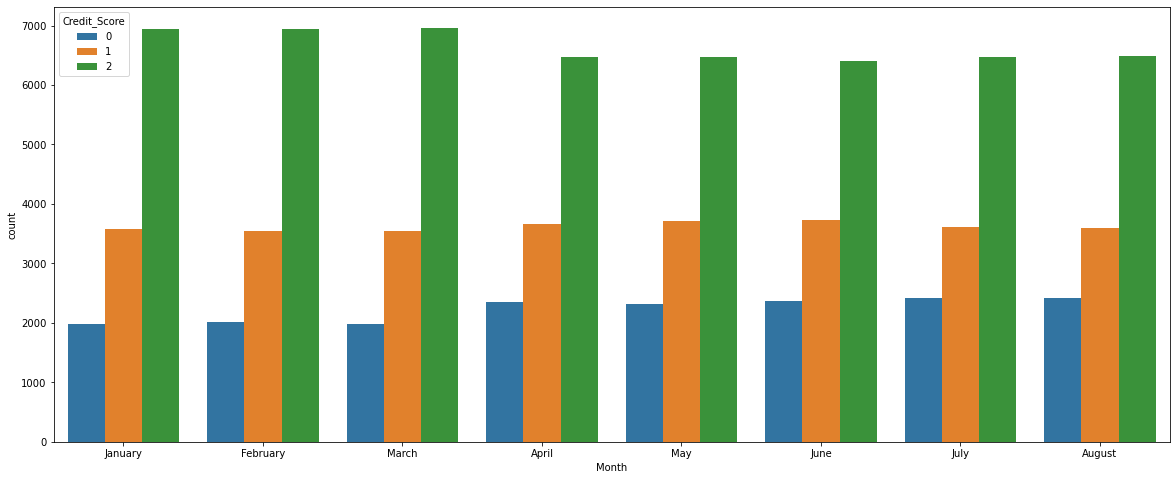

In [144]:
plt.figure(figsize=(20,8))
sns.countplot(data=trial_df,x="Month",hue="Credit_Score")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

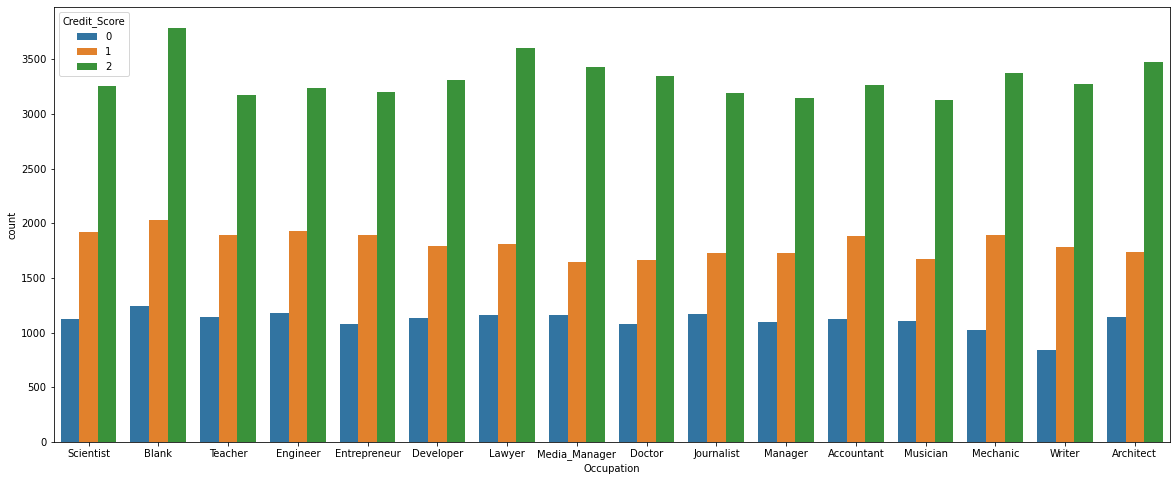

In [145]:
plt.figure(figsize=(20,8))
sns.countplot(data=trial_df,x="Occupation",hue="Credit_Score")

In [146]:
trial_df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

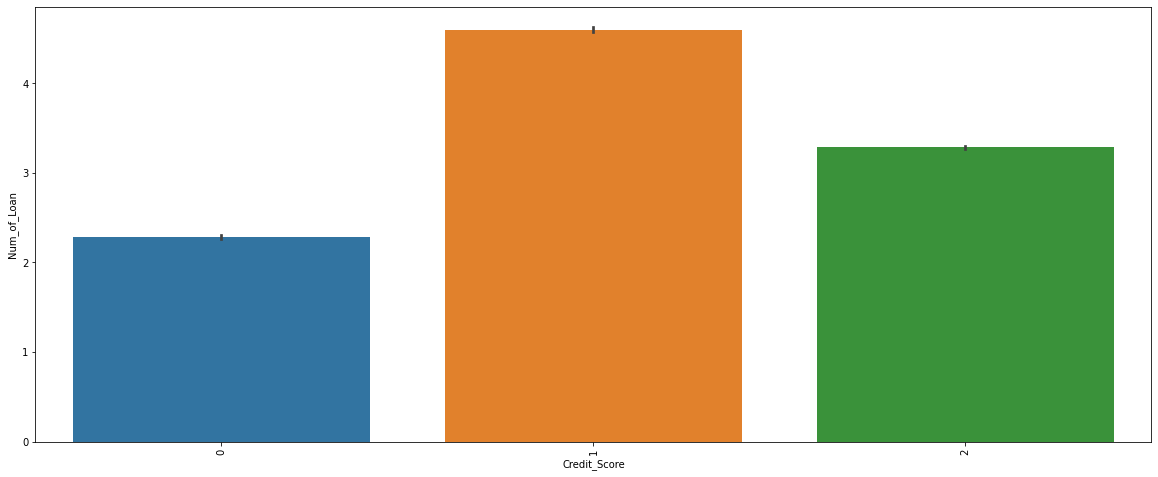

In [159]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Num_of_Loan",x="Credit_Score")
plt.xticks(rotation=90)
plt.show()

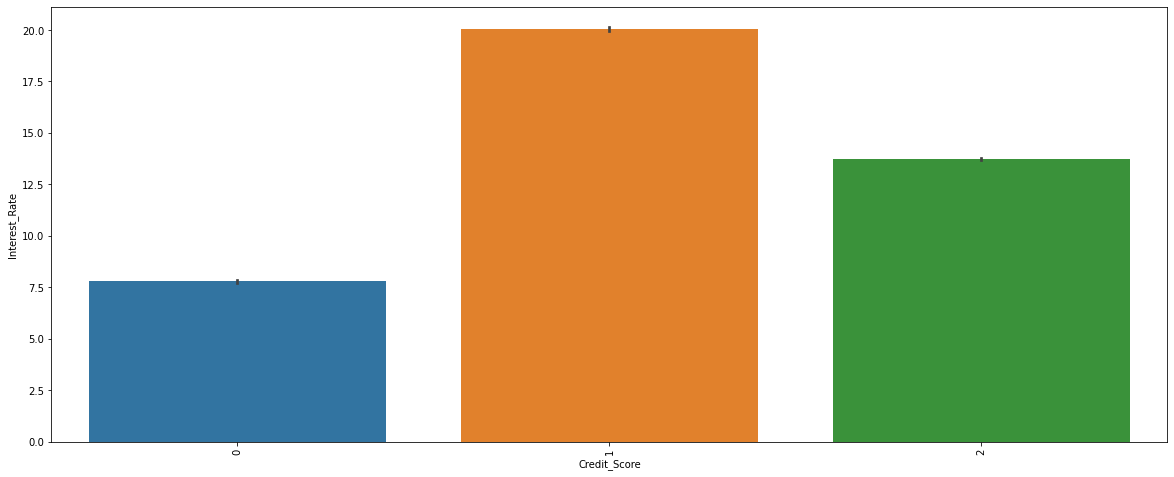

In [158]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Interest_Rate",x="Credit_Score")
plt.xticks(rotation=90)
plt.show()

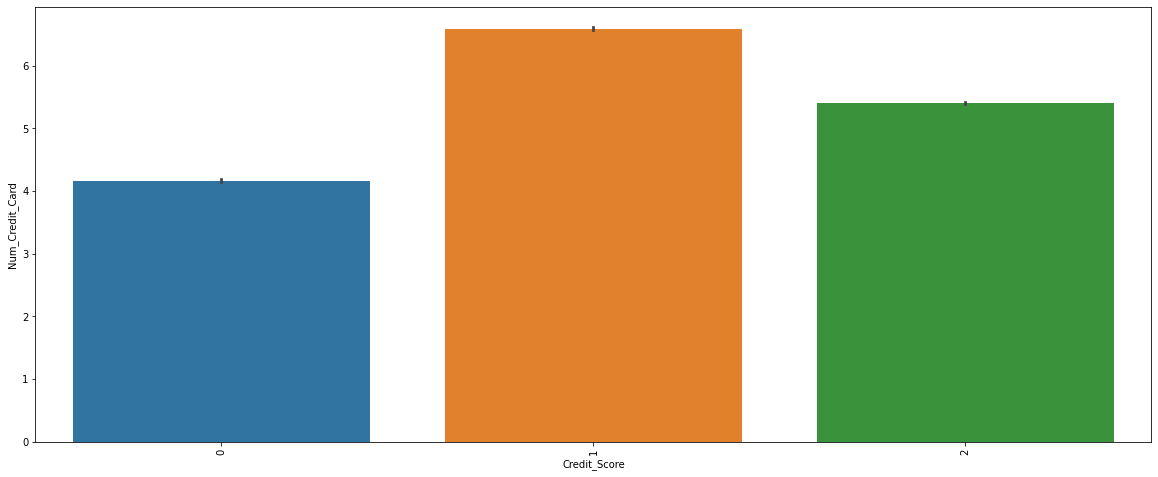

In [157]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Num_Credit_Card",x="Credit_Score")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Credit_Score', ylabel='Annual_Income'>

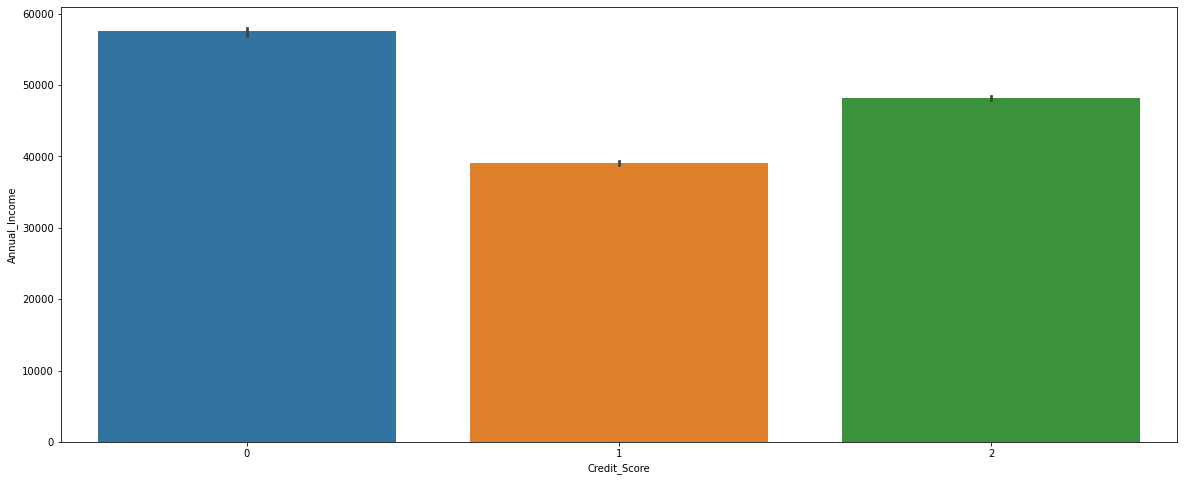

In [162]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Annual_Income",x="Credit_Score")

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

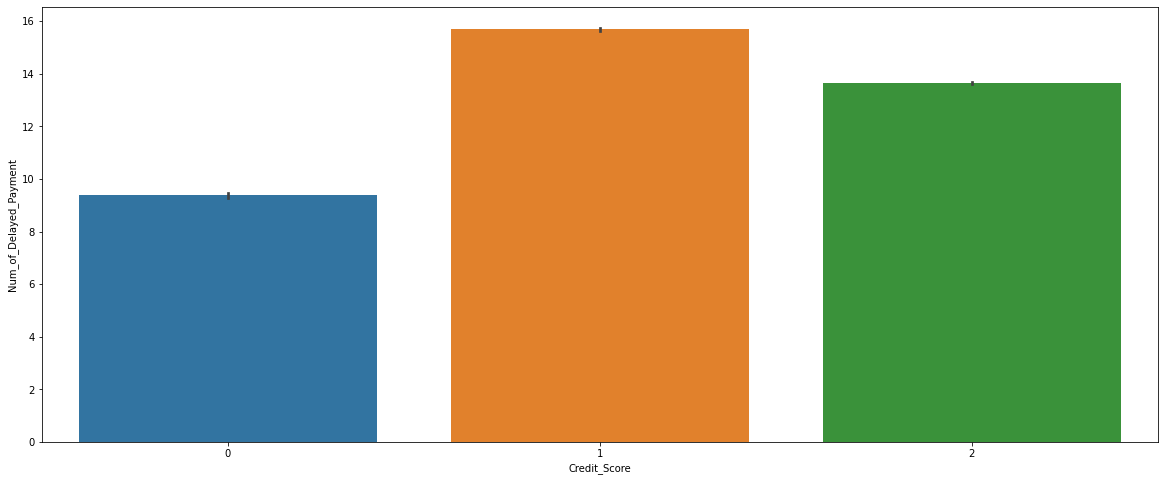

In [161]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Num_of_Delayed_Payment",x="Credit_Score")

<AxesSubplot:xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

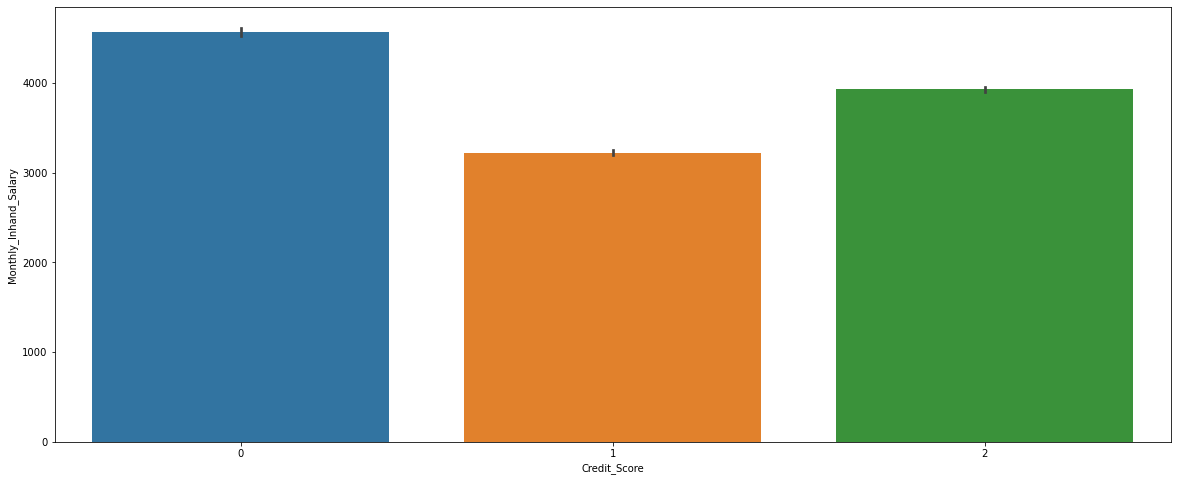

In [163]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Monthly_Inhand_Salary",x="Credit_Score")

<AxesSubplot:xlabel='Credit_Score', ylabel='Interest_Rate'>

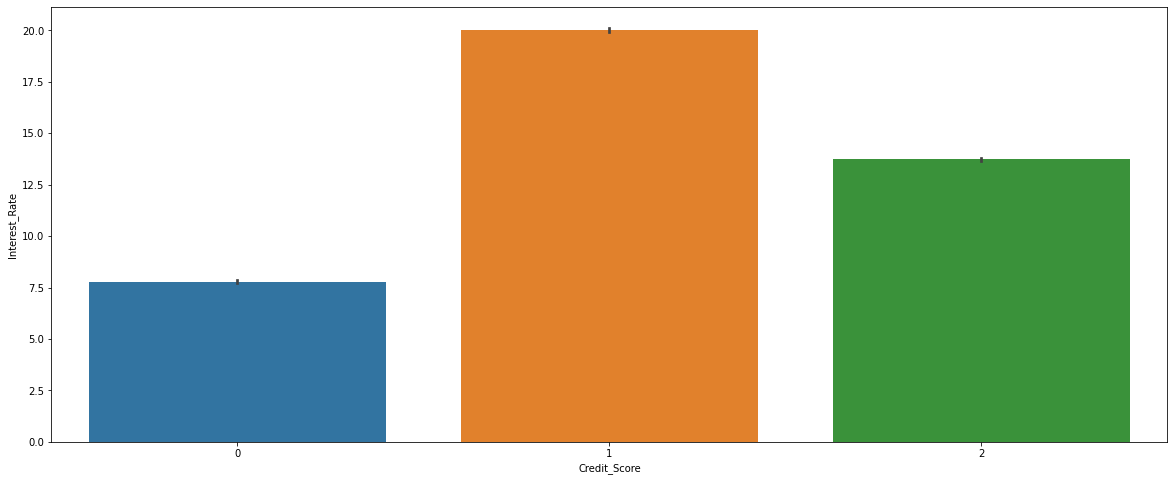

In [164]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Interest_Rate",x="Credit_Score")

<AxesSubplot:xlabel='Credit_Score', ylabel='Delay_from_due_date'>

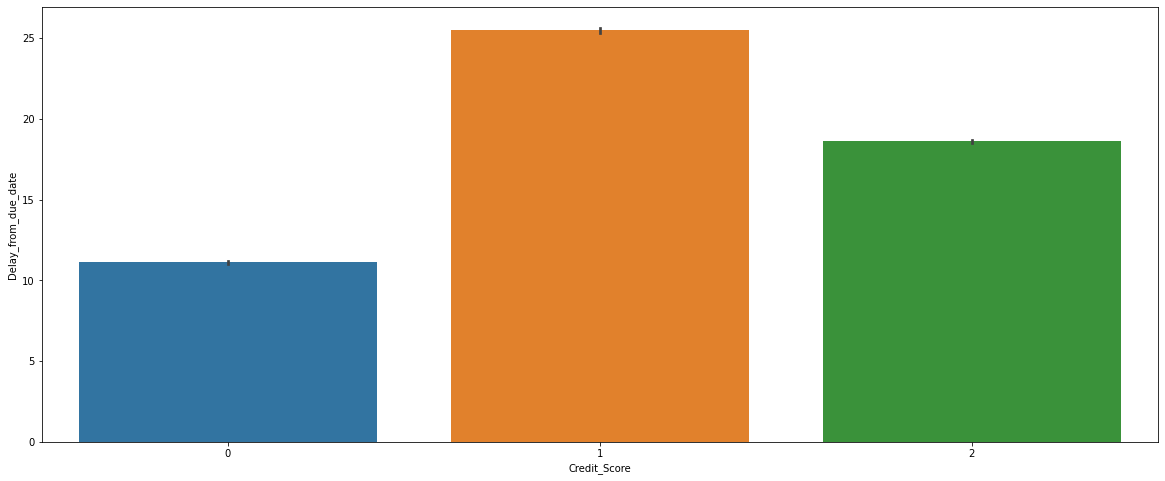

In [165]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Delay_from_due_date",x="Credit_Score")

<AxesSubplot:xlabel='Credit_Score', ylabel='Changed_Credit_Limit'>

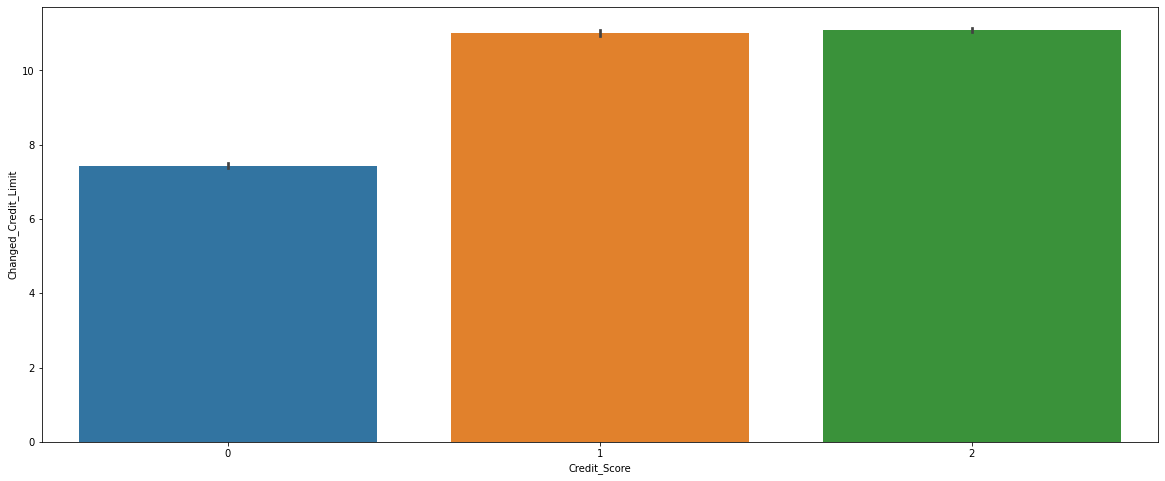

In [166]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Changed_Credit_Limit",x="Credit_Score")

<AxesSubplot:xlabel='Credit_Score', ylabel='Outstanding_Debt'>

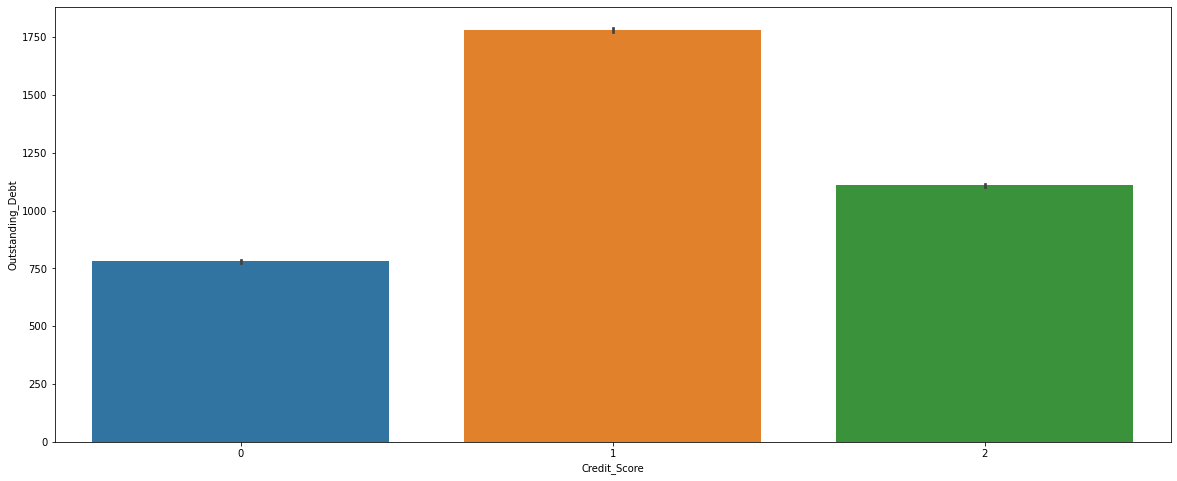

In [167]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Outstanding_Debt",x="Credit_Score")

<AxesSubplot:xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

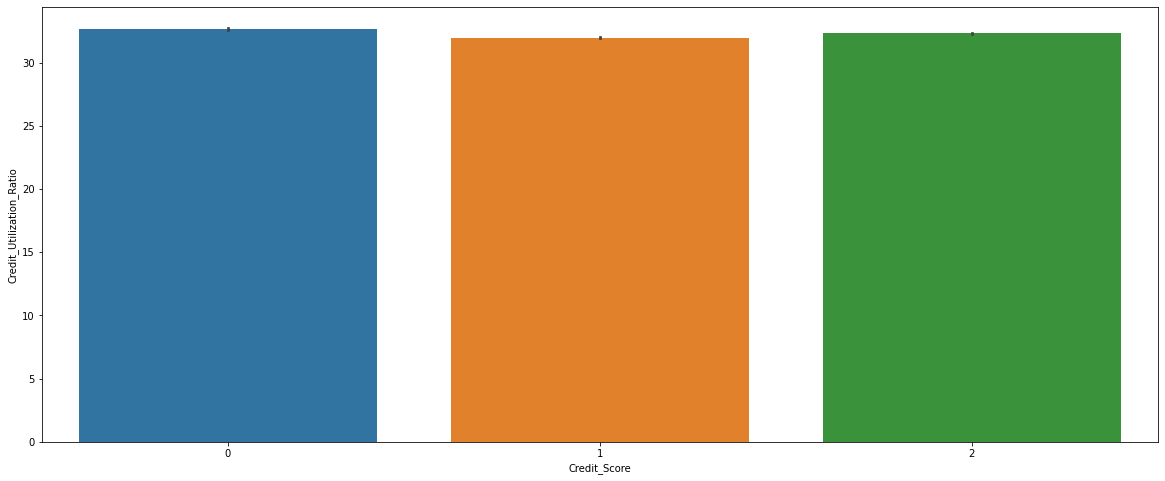

In [168]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Credit_Utilization_Ratio",x="Credit_Score")

<AxesSubplot:xlabel='Credit_Score', ylabel='Credit_History_Age'>

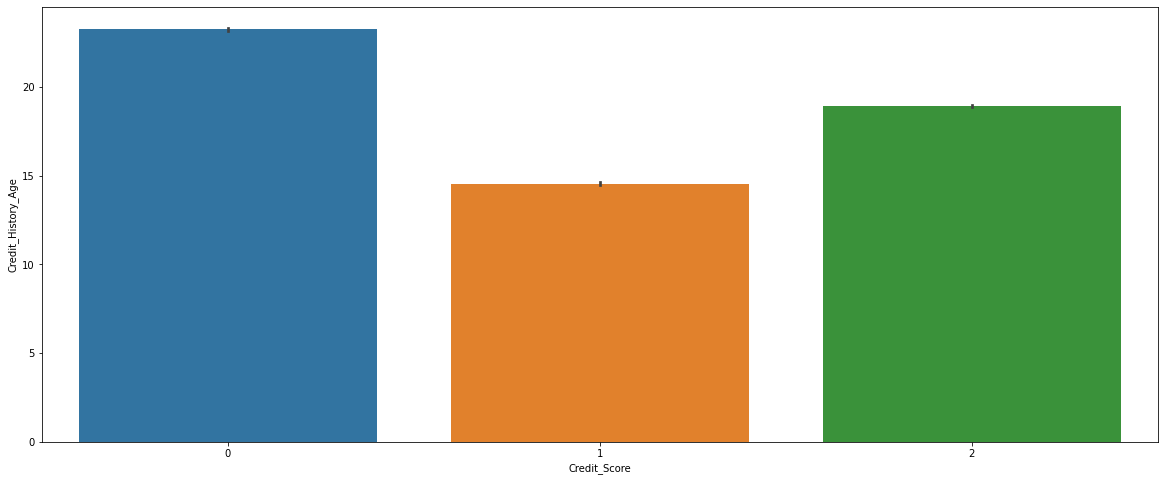

In [169]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Credit_History_Age",x="Credit_Score")

<AxesSubplot:xlabel='Credit_Score', ylabel='Total_EMI_per_month'>

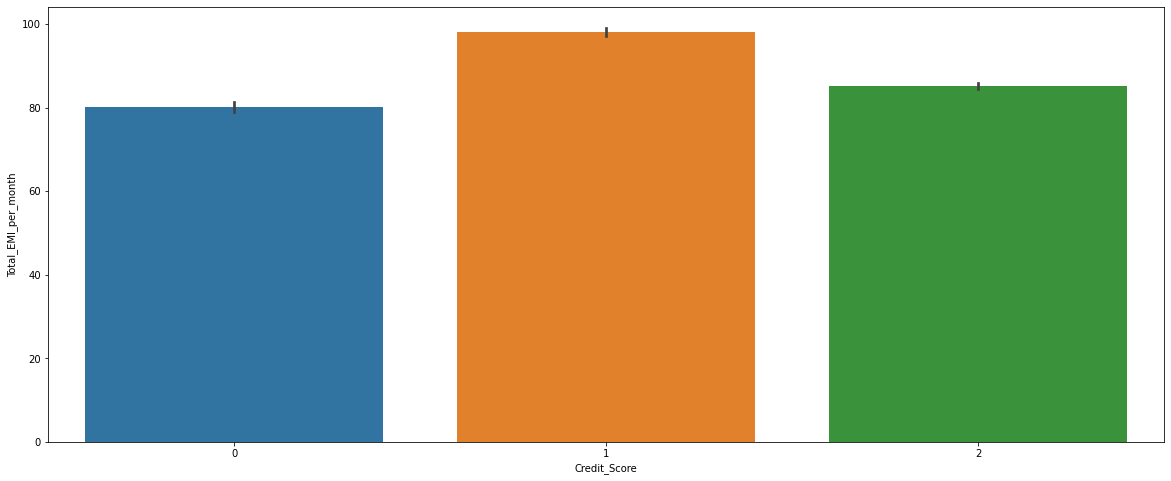

In [170]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Total_EMI_per_month",x="Credit_Score")

<AxesSubplot:xlabel='Credit_Score', ylabel='Amount_invested_monthly'>

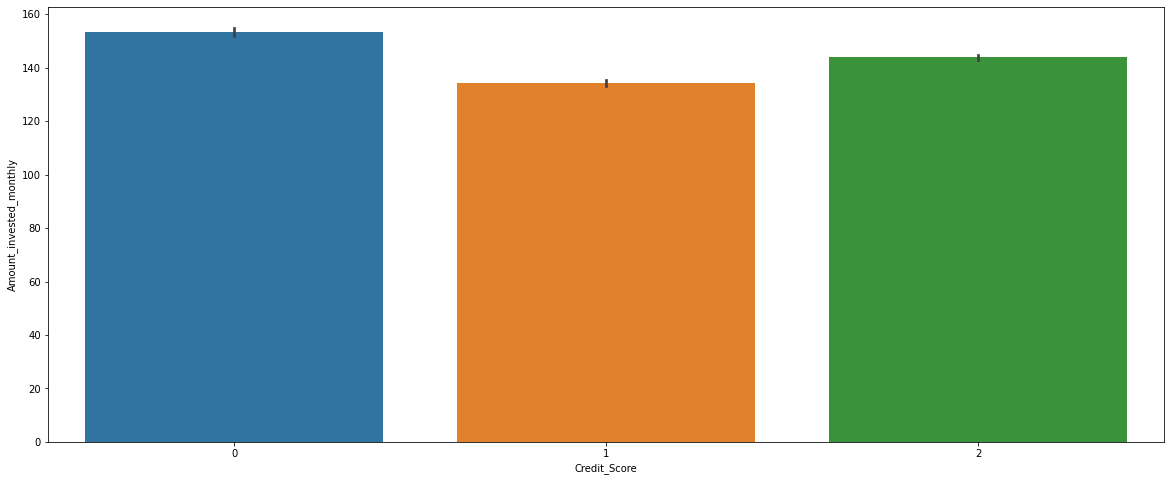

In [171]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Amount_invested_monthly",x="Credit_Score")

<AxesSubplot:xlabel='Credit_Score', ylabel='Monthly_Balance'>

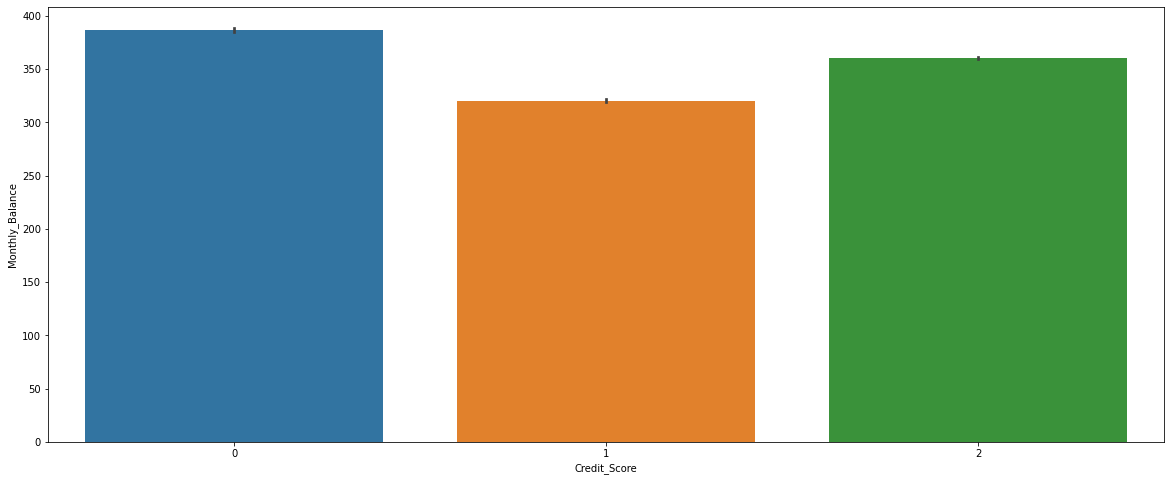

In [172]:
plt.figure(figsize=(20,8))
sns.barplot(data=trial_df,y="Monthly_Balance",x="Credit_Score")

In [173]:
correlation = final_training.corr()

In [174]:
correlation["Credit_Score"].sort_values(ascending=False)

Credit_Score                                          1.000000
Credit_Mix_Standard                                   0.316132
Payment_of_Min_Amount_Yes                             0.243400
Changed_Credit_Limit                                  0.185117
Num_of_Delayed_Payment                                0.184748
Num_Bank_Accounts                                     0.175975
Interest_Rate                                         0.119451
Delay_from_due_date                                   0.118345
Num_Credit_Card                                       0.112387
Num_Credit_Inquiries                                  0.066175
Num_of_Loan                                           0.060368
Payment_Behaviour_Low_spent_Small_value_payments      0.024717
Occupation_Writer                                     0.019548
Outstanding_Debt                                      0.015313
Credit_Mix_Bad                                        0.009738
Occupation_Mechanic                                   0

In [175]:
X=final_training.drop("Credit_Score",1)
Y=final_training["Credit_Score"]

In [176]:
X.dtypes

Occupation_Accountant                                   uint8
Occupation_Architect                                    uint8
Occupation_Blank                                        uint8
Occupation_Developer                                    uint8
Occupation_Doctor                                       uint8
Occupation_Engineer                                     uint8
Occupation_Entrepreneur                                 uint8
Occupation_Journalist                                   uint8
Occupation_Lawyer                                       uint8
Occupation_Manager                                      uint8
Occupation_Mechanic                                     uint8
Occupation_Media_Manager                                uint8
Occupation_Musician                                     uint8
Occupation_Scientist                                    uint8
Occupation_Teacher                                      uint8
Occupation_Writer                                       uint8
Credit_M

# Let's find important columns for our dataset using statistic

In [177]:
import statsmodels.api as sm

In [237]:
X_new =X.copy()
while 1<2:

    model = sm.OLS(Y, X_new).fit()
    new_df = pd.DataFrame()
    new_df["feature"] = model.params
    new_df["p_value"] = model.pvalues
    new_df = new_df.sort_values(by="p_value",ascending=False)
    new_df=new_df.reset_index()
    new_df=new_df.drop("feature",1)
    new_df["feature"] = new_df["index"]
    new_df = new_df.drop("index",1)
    if new_df.iloc[0,0] >0.05:
        new_df = new_df.drop(0,0)
        new_df =new_df.reset_index().drop("index",1)
    else:
        break
    X_new = X_new[list(new_df["feature"])]
    print(X_new.columns," ")

Index(['Age', 'Num_of_Loan', 'Annual_Income', 'Num_Bank_Accounts',
       'Monthly_Inhand_Salary', 'Monthly_Balance', 'Delay_from_due_date',
       'Credit_Mix_Bad', 'Num_of_Delayed_Payment', 'Interest_Rate',
       'Outstanding_Debt', 'Num_Credit_Card', 'Num_Credit_Inquiries',
       'Changed_Credit_Limit', 'Payment_of_Min_Amount_Yes', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_No'],
      dtype='object')  
Index(['Num_of_Loan', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Monthly_Balance', 'Delay_from_due_date',
       'Credit_Mix_Bad', 'Num_of_Delayed_Payment', 'Interest_Rate',
       'Outstanding_Debt', 'Num_Credit_Card', 'Num_Credit_Inquiries',
       'Changed_Credit_Limit', 'Payment_of_Min_Amount_Yes', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_No'],
      dtype='object')  


In [238]:
from sklearn.feature_selection import SelectKBest,f_classif
FI_1 = SelectKBest(f_classif,k="all")
FI_1.fit(X,Y)
New_FI = pd.DataFrame()
New_FI["Name"]=FI_1.feature_names_in_
New_FI["Importance"]=FI_1.scores_
New_FI=New_FI.sort_values(by="Importance",ascending=False)

In [239]:
filt=New_FI["Importance"]>4000
imp_cols=New_FI.loc[filt]["Name"]

In [240]:
imp_cols=list(imp_cols.iloc[:,])

In [241]:
imp_cols

['Interest_Rate',
 'Credit_Mix_Good',
 'Num_Credit_Inquiries',
 'Payment_of_Min_Amount_Yes',
 'Payment_of_Min_Amount_No',
 'Outstanding_Debt',
 'Num_Credit_Card',
 'Delay_from_due_date',
 'Num_Bank_Accounts',
 'Credit_History_Age',
 'Num_of_Delayed_Payment',
 'Credit_Mix_Bad',
 'Num_of_Loan',
 'Credit_Mix_Standard']

In [242]:
X.shape

(100000, 19)

In [243]:
len(imp_cols)

14

<AxesSubplot:xlabel='Importance', ylabel='Name'>

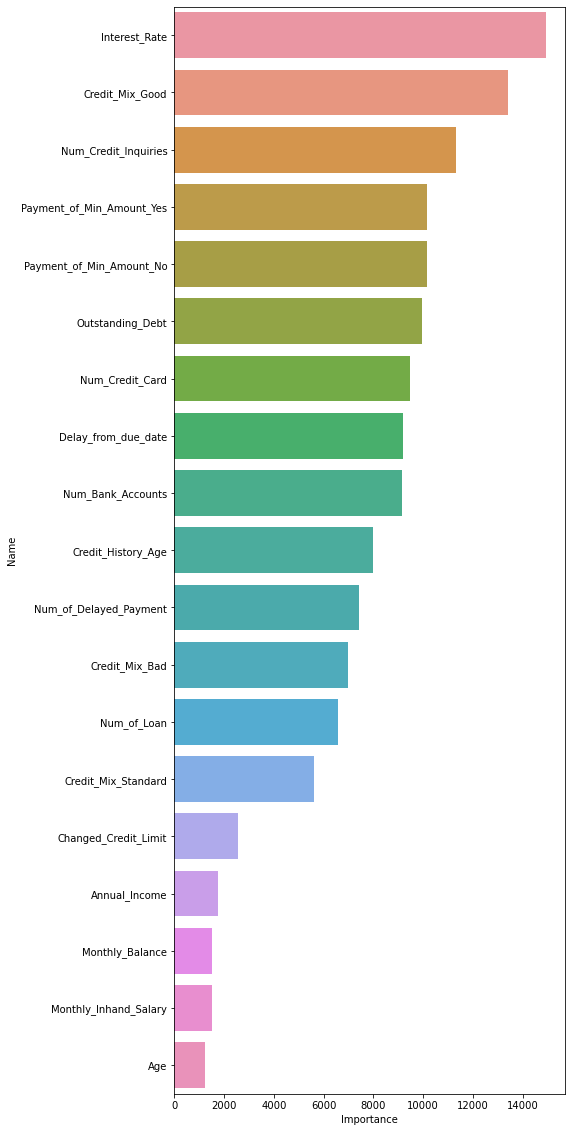

In [244]:
plt.figure(figsize=(7,20))
sns.barplot(data=New_FI,x="Importance",y="Name")

In [245]:
X=X[imp_cols]

In [246]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8,random_state=42,stratify=Y)

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
forest = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)

In [249]:
forest.fit(xtrain,ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished


RandomForestClassifier(max_features='auto', n_jobs=-1, oob_score=True,
                       random_state=42, verbose=1)

In [250]:
forest.oob_score_

0.7747

In [251]:
all_score_report.score_clf(ytrain,forest.predict(xtrain))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s


 
accuracy score: 
0.9997
 
precision score macro: 
0.9996150695753453
 
recall score macro: 
0.9997441411862376
 
f1 score macro: 
0.9996795603226455
 
confusion matrix original: 
[[14261     0     1]
 [    0 23191     8]
 [   11     4 42524]]
 
confusion matrix in %: 
[[1.782625e+01 0.000000e+00 1.250000e-03]
 [0.000000e+00 2.898875e+01 1.000000e-02]
 [1.375000e-02 5.000000e-03 5.315500e+01]]
 
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14262
           1       1.00      1.00      1.00     23199
           2       1.00      1.00      1.00     42539

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished


In [252]:
all_score_report.score_clf(ytest,forest.predict(xtest))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


 
accuracy score: 
0.78005
 
precision score macro: 
0.7681911975480925
 
recall score macro: 
0.7670979405130752
 
f1 score macro: 
0.7676248548182235
 
confusion matrix original: 
[[2565   19  982]
 [ 103 4543 1153]
 [ 846 1296 8493]]
 
confusion matrix in %: 
[[12.825  0.095  4.91 ]
 [ 0.515 22.715  5.765]
 [ 4.23   6.48  42.465]]
 
classification report: 
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      3566
           1       0.78      0.78      0.78      5799
           2       0.80      0.80      0.80     10635

    accuracy                           0.78     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [253]:
from sklearn.model_selection import RandomizedSearchCV

In [254]:
param_grid = {"n_estimators":[50],   
    "max_depth":[5,10,15,20,25,30,None],
    "min_samples_split":[2,4,6,8,10,12,14],
    "n_jobs":[-1]}

In [255]:
grid = RandomizedSearchCV(forest,param_distributions=param_grid,n_iter=50,scoring="f1_macro",n_jobs=-1)

In [256]:
xtrain.shape

(80000, 14)

In [257]:
x_for_grid = xtrain[:5000]
y_for_grid = ytrain[:5000]

In [258]:
y_for_grid.value_counts()

2    2662
1    1418
0     920
Name: Credit_Score, dtype: int64

In [259]:
grid.fit(x_for_grid,y_for_grid)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomizedSearchCV(estimator=RandomForestClassifier(max_features='auto',
                                                    n_jobs=-1, oob_score=True,
                                                    random_state=42,
                                                    verbose=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30,
                                                      None],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [50], 'n_jobs': [-1]},
                   scoring='f1_macro')

In [260]:
grid.best_params_

{'n_jobs': -1, 'n_estimators': 50, 'min_samples_split': 6, 'max_depth': 15}

In [266]:
grid.best_score_

0.6642429930123998

In [267]:
clf = RandomForestClassifier(n_estimators=1000,
    max_depth=grid.best_params_["max_depth"],
    min_samples_split=grid.best_params_["min_samples_split"],

    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [268]:
clf.fit(xtrain,ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s


building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.9s


building tree 157 of 1000
building tree 158 of 1000
building tree 159 of 1000
building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    9.0s


building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   16.3s


building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tre

building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000building tree 994 of 1000

building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   27.3s finished


RandomForestClassifier(max_depth=15, min_samples_split=6, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=2)

In [269]:
all_score_report.score_clf(ytrain,clf.predict(xtrain))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    4.7s finished


 
accuracy score: 
0.8104
 
precision score macro: 
0.7878434023004627
 
recall score macro: 
0.8000062161003946
 
f1 score macro: 
0.7933373643241558
 
confusion matrix original: 
[[10784   136  3342]
 [ 1146 19050  3003]
 [ 3730  3811 34998]]
 
confusion matrix in %: 
[[13.48     0.17     4.1775 ]
 [ 1.4325  23.8125   3.75375]
 [ 4.6625   4.76375 43.7475 ]]
 
classification report: 
              precision    recall  f1-score   support

           0       0.69      0.76      0.72     14262
           1       0.83      0.82      0.82     23199
           2       0.85      0.82      0.83     42539

    accuracy                           0.81     80000
   macro avg       0.79      0.80      0.79     80000
weighted avg       0.81      0.81      0.81     80000



In [270]:
all_score_report.score_clf(ytest,clf.predict(xtest))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.8s


 
accuracy score: 
0.74495
 
precision score macro: 
0.7209743205578848
 
recall score macro: 
0.7362668130180731
 
f1 score macro: 
0.727720498839522
 
confusion matrix original: 
[[2502   46 1018]
 [ 333 4355 1111]
 [1179 1414 8042]]
 
confusion matrix in %: 
[[12.51   0.23   5.09 ]
 [ 1.665 21.775  5.555]
 [ 5.895  7.07  40.21 ]]
 
classification report: 
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      3566
           1       0.75      0.75      0.75      5799
           2       0.79      0.76      0.77     10635

    accuracy                           0.74     20000
   macro avg       0.72      0.74      0.73     20000
weighted avg       0.75      0.74      0.75     20000



[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.3s finished
